In [14]:
import sys
import csv
from sklearn import tree
from sklearn import preprocessing
import matplotlib
import graphviz
import numpy as np

In [15]:
szDatasetPath = 'breast_cancer.csv'

'''
Read the data from the csv file
listColNames[j] stores the jth column name
listData[i][:-1] are the features of the ith example
listData[i][-1] is the target value of the ith example
'''
listColNames = [] # The list of column names
listData = [] # The list of feature vectors of all the examples
nRow = 0
with open(szDatasetPath) as csvFile:
    csvReader = csv.reader(csvFile, delimiter=',')
    for row in csvReader:
        if 0 == nRow:
            listColNames = row
        else:
            listData.append(row)
        nRow += 1

'''
Scan the data and store the unique values of each column.
listColUniqueVals[j] stores a list of unique values of the jth column
'''
listColUniqueVals = [[] for i in range(len(listColNames))]
for example in listData:
    for i in range(len(example)):
        if example[i] not in listColUniqueVals[i]:
            listColUniqueVals[i].append(example[i])


In [3]:
listColNames

['age',
 'menopause',
 'tumor-size',
 'inv-nodes',
 'node-caps',
 'deg-malig',
 'breast',
 'breast-quad',
 'irradiat',
 'class']

In [4]:
listColUniqueVals

[['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'],
 ['premeno', 'ge40', 'lt40'],
 ['30-34',
  '20-24',
  '15-19',
  '0-4',
  '25-29',
  '50-54',
  '14-Oct',
  '40-44',
  '35-39',
  '9-May',
  '45-49'],
 ['0-2', '8-Jun', '11-Sep', '5-Mar', '15-17', '14-Dec', '24-26'],
 ['no', 'yes', '?'],
 ['3', '2', '1'],
 ['left', 'right'],
 ['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
 ['no', 'yes'],
 ['no-recurrence-events', 'recurrence-events']]

In [ ]:
listData

In [5]:
clf = tree.DecisionTreeClassifier(max_depth=1, criterion='entropy')
print(clf)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [20]:
#Calculate entropy of an array
def entropy(labels):
    prob_dict = {x:labels.count(x)/len(labels) for x in labels}
    probs = np.array(list(prob_dict.values()))

    return - probs.dot(np.log2(probs))

In [7]:
le = preprocessing.LabelEncoder()

In [8]:
classCol = [row[-1] for row in listData]
classColEncoded = le.fit_transform(classCol)

In [9]:
for i in range(0,len(listColNames)-1):
    featureCol = [row[i] for row in listData]
    featureCol = le.fit_transform(featureCol)

In [10]:
ageCol = [row[0] for row in listData]

In [11]:
ageCol = le.fit_transform(ageCol)

In [12]:
ageCol

array([1, 2, 2, 4, 2, 4, 3, 4, 2, 2, 2, 3, 4, 3, 2, 4, 2, 3, 4, 3, 3, 4,
       1, 3, 3, 2, 3, 4, 2, 4, 3, 3, 3, 3, 3, 1, 3, 3, 2, 2, 3, 4, 4, 2,
       3, 3, 2, 3, 2, 2, 3, 1, 3, 5, 5, 5, 3, 3, 4, 4, 2, 2, 3, 0, 2, 2,
       2, 3, 3, 4, 4, 2, 4, 3, 1, 3, 3, 1, 3, 2, 3, 4, 4, 3, 2, 3, 4, 5,
       3, 2, 1, 3, 3, 4, 3, 2, 4, 4, 2, 1, 2, 3, 3, 2, 2, 2, 2, 1, 2, 4,
       3, 3, 2, 2, 2, 3, 1, 2, 1, 4, 4, 3, 3, 3, 4, 5, 1, 1, 3, 2, 2, 2,
       2, 3, 4, 1, 1, 2, 1, 2, 3, 3, 4, 2, 4, 2, 4, 3, 1, 3, 3, 4, 3, 4,
       1, 4, 3, 3, 3, 2, 2, 2, 4, 4, 4, 2, 2, 2, 3, 2, 1, 1, 4, 3, 3, 2,
       2, 4, 3, 2, 2, 2, 2, 3, 3, 2, 3, 4, 2, 3, 2, 2, 3, 1, 3, 3, 3, 2,
       3, 3, 4, 3, 2, 3, 3, 1, 3, 3, 3, 2, 2, 3, 2, 3, 4, 2, 3, 2, 4, 1,
       2, 1, 4, 4, 1, 2, 2, 3, 4, 4, 3, 2, 1, 5, 4, 3, 2, 2, 1, 2, 4, 2,
       3, 3, 2, 1, 1, 3, 4, 1, 2, 2, 1, 4, 2, 2, 2, 2, 3, 3, 4, 2, 4, 3,
       3, 1, 2, 4, 1, 2, 3, 3, 2, 4, 4, 2, 1, 4, 3, 3, 3, 1, 1, 4, 2, 3])

In [22]:
ageDict = dict()
print(entropy(classCol))
for i in range(0,6):
    i2= i+0.5
    less = []
    more = []
    for x in range(len(ageCol)):
        if(ageCol[x]<i2):
            less.append(classColEncoded[x])
        elif(ageCol[x]>i2):
            more.append(classColEncoded[x])
    print("less than entropy " + str(i2) + ": "+str(entropy(less)))
    print("more than entropy " + str(i2) + ": "+str(entropy(more)))
    print()

0.8778446951746506
less than entropy 0.5: -0.0
more than entropy 0.5: 0.8791357668533336

less than entropy 1.5: 0.9740248644357521
more than entropy 1.5: 0.8569784970622595

less than entropy 2.5: 0.9156487708004133
more than entropy 2.5: 0.8420956603976348

less than entropy 3.5: 0.8818383667221814
more than entropy 3.5: 0.863120568566631

less than entropy 4.5: 0.8812908992306927
more than entropy 4.5: 0.6500224216483541

less than entropy 5.5: 0.8778446951746506
more than entropy 5.5: -0.0



In [18]:
clf.fit(ageCol.reshape(-1,1),classColEncoded)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

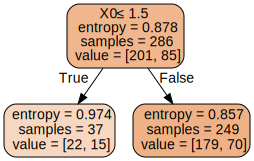

In [19]:
dot_data = tree.export_graphviz(clf, out_file=None,filled=True, rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)
graph